In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1D linear diffusion equation
In this notebook we develop a code to solve the linear diffusion equation:
$$\frac{\partial h}{\partial t}=K\frac{\partial^2h}{\partial x^2}$$
with the following initial condition:
$$h(t=0)=h_0\sin(2\pi nx/L)$$
and boundary conditions:
$$h(x=0)=x \textrm{ and } h(x=L)=0$$
using an explicit finite difference scheme, which transforms this equation in a series of algebraic equations:
$$h_i(t+\Delta t)=h_i(t)+\frac{K\Delta t}{\Delta x^2}\Bigl(h_{i+1}(t)-2h_i(t)+h_{i-1}(t)\Bigr)$$
for all $N$ nodes, $i$, equally spaced from $0$ to $L$. $\Delta x=L/(nx-1)$ is the spacing between the nodes and $\Delta t$ is the time difference between two successive time steps at which we calculate the solution. The boundary conditions are enforced by keeping $h_{i=0}=0$ and $h_{i=-1}=0$.

In [4]:
L = 1000 # size of the domain where we solve the equation (in m)
nx = 201 # number of points/nodes used to discretize and solve the equation
dx = L/(nx - 1) # node spacing or spatial resolution
K = 0.1 # diffusivity (or transport coefficient) (in m$^2$/yr)
dt = 1000/8 # time step length (in yr)
n = 2 # number of hilltops in the initial condition
h0 = 100 # height of the hills in the initial condition

We create an array containing the $x$-coordinate of the nodes (mostly for plotting purpose) and use it to definie the initial condition $h$

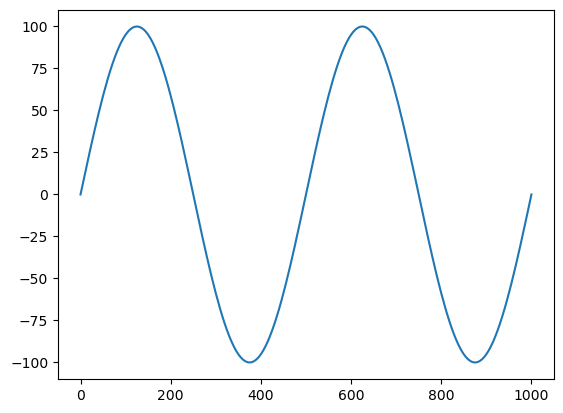

In [5]:
x = np.linspace(0, L, nx)
h = h0 * np.sin(2*np.pi*n*x/L)
plt.plot(x,h);

The explicit finite difference solution is only stable for values of the time steps that satisfy the Courant condition:
$$\frac{K\Delta t}{\Delta x^2}<0.5$$

In [6]:
print('Courant:', K*dt/dx**2)

Courant: 0.5


We now solve the equation through a loop on time; we reset the solution $h$ to its initial condition every time we run this loop/cell

We also compare the numerical solution to an anlytical solution to the problem/equation described above:
$$h_a=h_0\sin(\frac{2\pi nx}{L})e^{-\frac{4\pi^2n^2Kt}{L^2}}$$

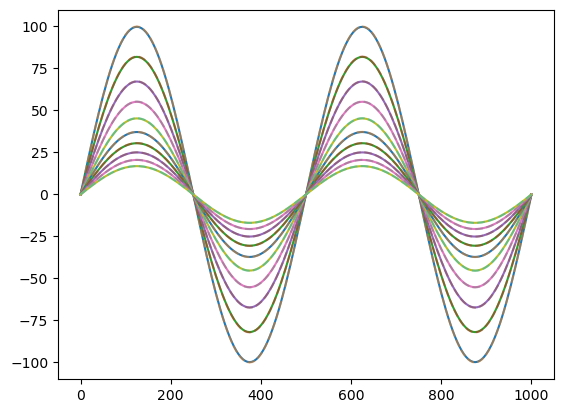

In [7]:
h = h0 * np.sin(2*np.pi*n*x/L) # re-initialize h

for step in range(1000): # loop on time
    t = step*dt # computing the current time used to compute the analytical solution
    h[1:-1] = h[1:-1] + K*dt/dx**2 * (h[2:] - 2*h[1:-1] + h[:-2]) # finite difference calculation
    ha = h0*np.sin(2*np.pi*n*x/L)*np.exp(-4*np.pi**2*n**2*K*t/L**2) # analytical solution
    if step%100==0: # we plot the solution every 100 time steps
        plt.plot(x, h)
        plt.plot(x, ha, '--', alpha=0.5)

We now build an initial condition made of two sine functions of different wavelength

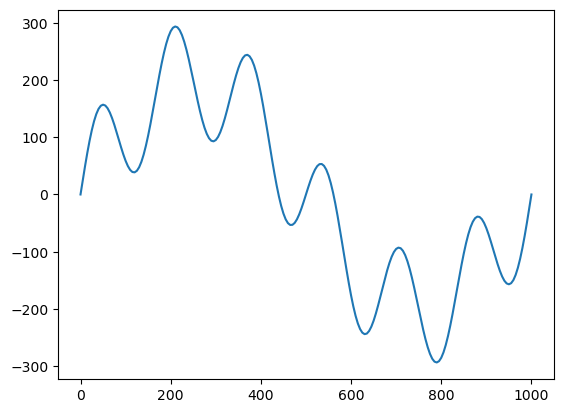

In [8]:
h = h0 * (2*np.sin(2*np.pi*x/L) + np.sin(2*np.pi*6*x/L))
plt.plot(x,h)

We re-compute the solution and see that the short wavelength disappears very rapidly compared to the long wavelength part of the initial condition. This is because the response or diffusion time depends on the square of the wavelength of the topography. This explains why 'old' landscapes appear smooth.

Courant: 0.5


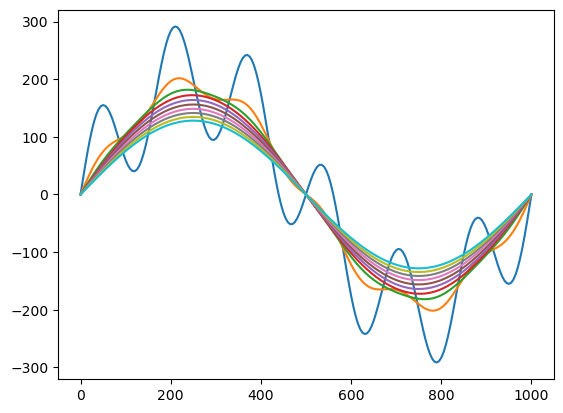

In [9]:
print('Courant:', K*dt/dx**2)
h = h0 * (2*np.sin(2*np.pi*x/L) + np.sin(2*np.pi*6*x/L))
for step in range(1000):
    t = step*dt
    h[1:-1] = h[1:-1] + K*dt/dx**2 * (h[2:] - 2*h[1:-1] + h[:-2])
    ha = h0*np.sin(2*np.pi*n*x/L)*np.exp(-4*np.pi**2*n**2*K*t/L**2)
    if step%100==0:
        plt.plot(x, h)
        # plt.plot(x, ha, '--', alpha=0.5)